# Udacity Self-Driving Car Nanodegree

## Advanced Lane Finding Project - Part 2 (for part 1 review camera_calibration.ipynb)

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import glob
import matplotlib.pyplot as plt
from lib.camera import Camera
from lib.line_finder import LineFinder

%matplotlib inline

### First step, let's take a good look into the images we are working with

As we take a look to all images into a grid, we can already calculate the objpoints and imgpoints that we can store for a later usage. Not all the images in the sample actually matches the description of the 9 by 6 chess board, meaning that we won't be able to record points for all images.

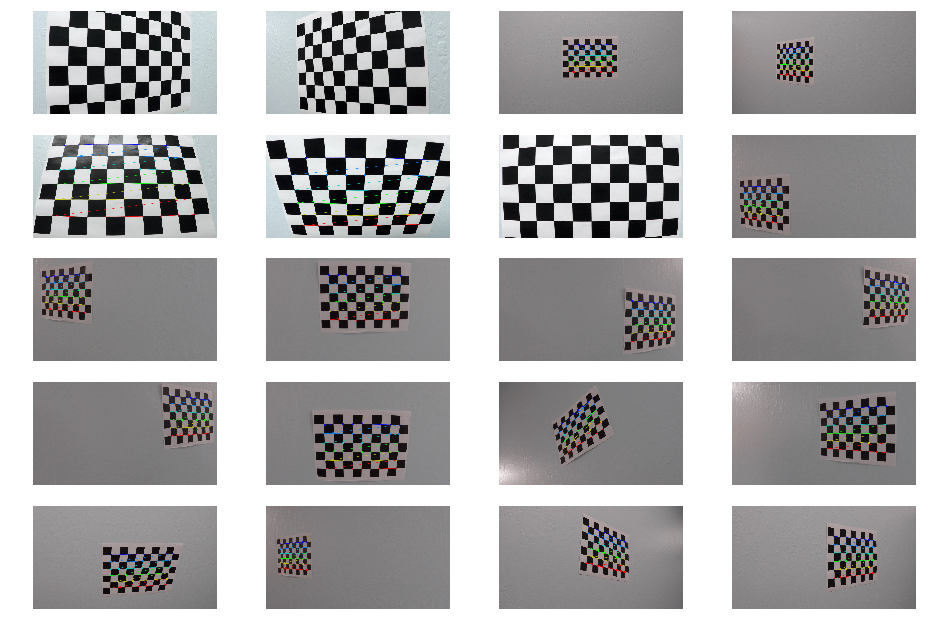

In [5]:
camera = Camera()

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

fig, axs = plt.subplots(5,4, figsize=(16, 11))
axs = axs.ravel()

# Go through the images one by one
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    img = camera.sample_image(img)
        
    axs[i].axis('off')
    axs[i].imshow(img)

Next in our pipeline we are going to calibrate the camera

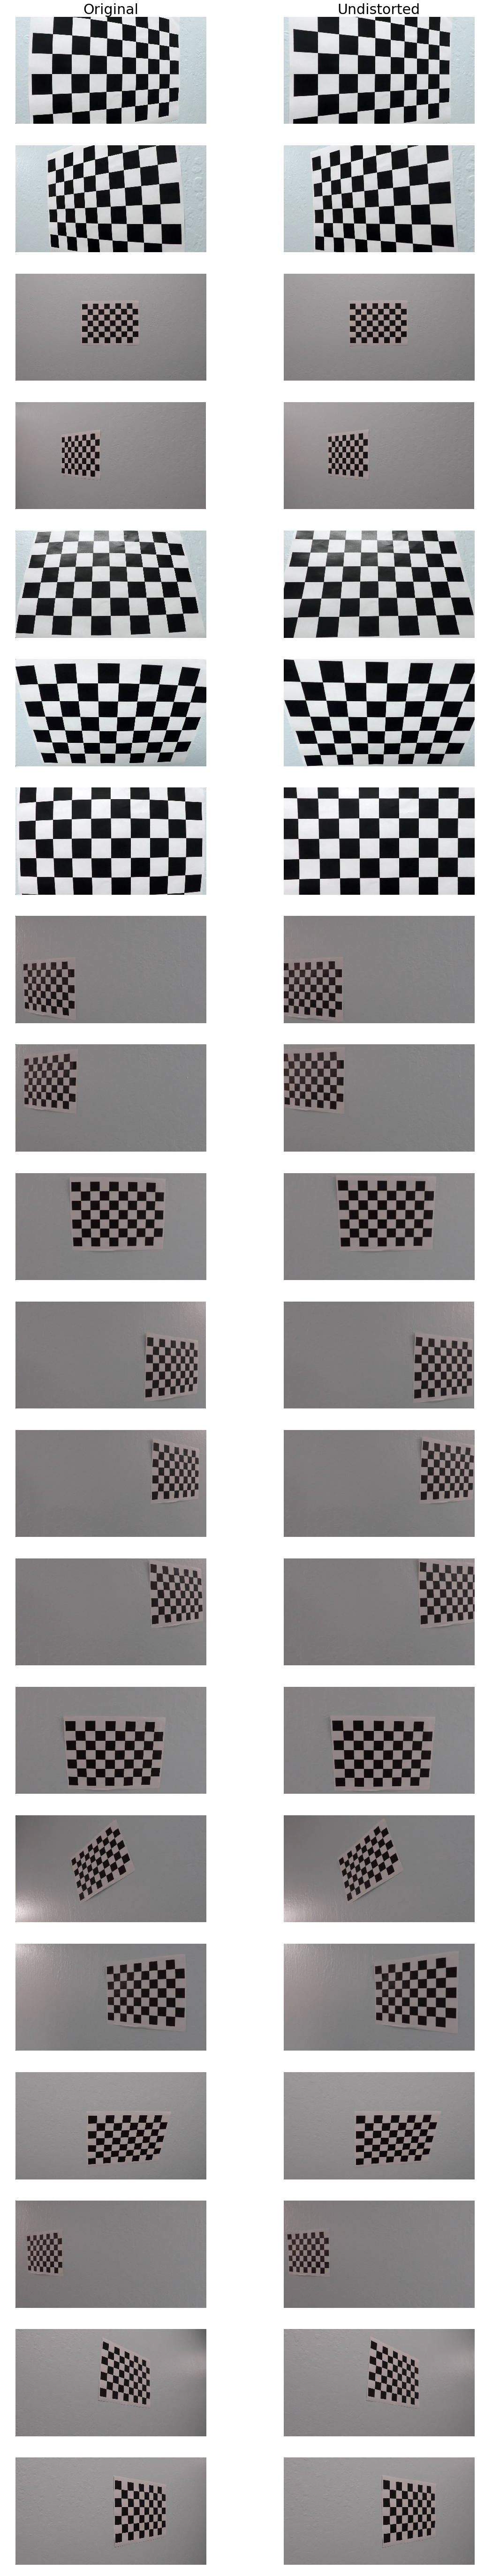

In [7]:
camera.calibrate()

fig, axs = plt.subplots(len(images),2, figsize=(20, 100))
fig.subplots_adjust(hspace = .2, wspace=.05)
axo = axs[:,0]
axm = axs[:,1]
axo[0].set_title('Original', fontsize=30)
axm[0].set_title('Undistorted', fontsize=30)

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    axo[i].axis('off')
    axo[i].imshow(img)
    
    # camera calibration happening here
    dst = camera.undistort(img)
    
    axm[i].axis('off')
    axm[i].imshow(dst)

## Now let's work with real world road images


In [ ]:
images = glob.glob('./test_images/*.jpg')
line_finder = LineFinder(camera, True)